# 導入不同策略 根據最新300根k棒產生的買賣序列 進行回測 畫出圖表

     timestamp    open    high     low   close  signal
0   2024-07-27  0.4650  0.4800  0.4450  0.4680       0
1   2024-07-28  0.4690  0.4690  0.4400  0.4480       0
2   2024-07-29  0.4490  0.4760  0.4370  0.4390       0
3   2024-07-30  0.4400  0.4480  0.4050  0.4110       1
4   2024-07-31  0.4120  0.4180  0.3920  0.3990       0
..         ...     ...     ...     ...     ...     ...
360 2025-07-22  0.5172  0.5391  0.4672  0.5084       0
361 2025-07-23  0.5084  0.5098  0.4400  0.4603      -1
362 2025-07-24  0.4603  0.5110  0.4244  0.4719       0
363 2025-07-25  0.4720  0.6245  0.4650  0.6019       1
364 2025-07-26  0.6019  0.6214  0.5542  0.5649       0

[365 rows x 6 columns]


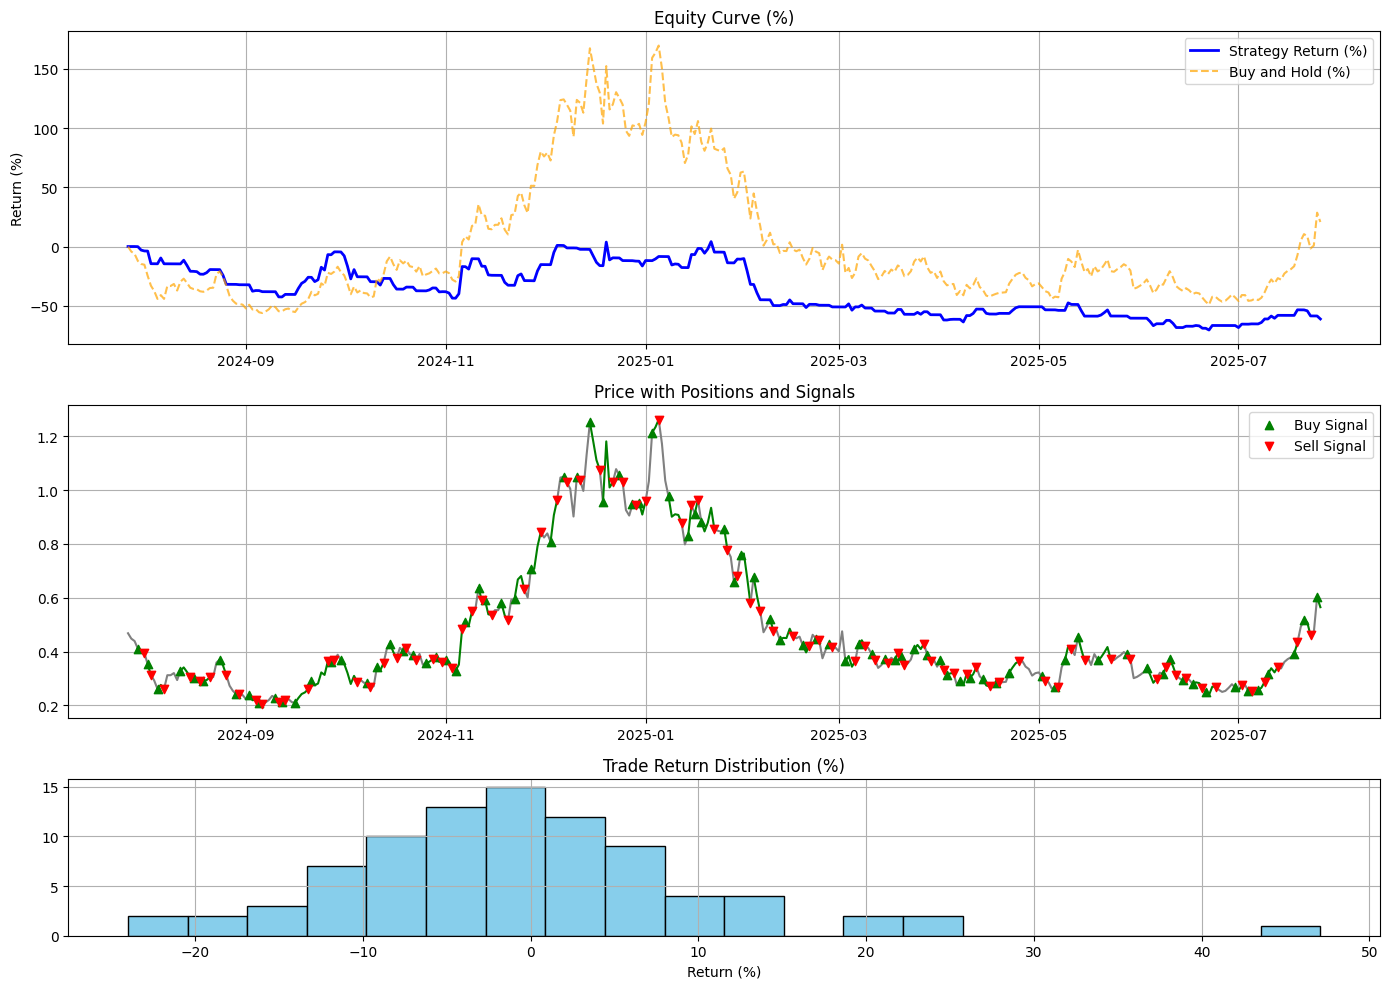

In [3]:
import Technicalindicatorstrategy
from datetime import datetime
from Backtest.backtest import backtest_signals
from Plot.plot import plot_backtest_result
import warnings 
warnings.filterwarnings('ignore')

strategies = [
    "adx","tvl_sma", "boll", "cci", "ema", "kd",
    "macd", "momentum", "rsi", "sma",
    "smartmoney", "williams"
]
strategies = "apy"

strat_module = getattr(Technicalindicatorstrategy, strategies)

df_signals = strat_module.get_signals("ENAUSDT", "1d", datetime.now(),limit=365)
    
# 回測
result = backtest_signals(df_signals, 
                        initial_capital=100, 
                        fee_rate=0.001, 
                        leverage=1, 
                        allow_short=False)

# 繪圖
plot_backtest_result(result)


In [ ]:
from online.auto_trade_future import auto_trade_futures
from Technicalindicatorstrategy import testsma

class StrategyWrapper:
    def __init__(self,n1=1,n2=2):
        self.n1 = n1
        self.n2 = n2
        self.limit = 300

    def get_signals(self, symbol, interval, end_time):
        print(f"⚙️ 呼叫策略：symbol={symbol}, interval={interval}, end_time={end_time}, "
              f"n1={self.n1}, n2={self.n2}")
        return testsma.get_signals(symbol, interval, end_time, limit=self.limit, n1=self.n1,n2=self.n2)

strategy = StrategyWrapper()

auto_trade_futures(symbol="ETH/USDT",interval="1m",usdt_per_order=500,leverage=1,strategy=strategy)

✅ 使用 Testnet 模式
✅ 槓桿設為 1x
✅ 最小下單量: 0.0001, 數量精度: 0.0001

⚙️ 呼叫策略：symbol=ETHUSDT, interval=1m, end_time=2025-07-26 16:12:10.521411, n1=1, n2=2
[2025-07-26 16:12:10] Close: 3743.86, Signal: 1
目前持倉: 0.133000 (long), USDT 餘額: 14487.53
⏸ 訊號未變或已有倉位，無操作
